## Data exploration ##

Load the data into memory

In [39]:
%matplotlib inline
import idx2numpy
import numpy as np
trainfile = 'train-images-idx3-ubyte'
trainfilelabels = 'train-labels-idx1-ubyte'
testfile = 't10k-images-idx3-ubyte'
testfilelabels = 't10k-labels-idx1-ubyte'
x_train = idx2numpy.convert_from_file(trainfile)
y_train = idx2numpy.convert_from_file(trainfilelabels)
x_test = idx2numpy.convert_from_file(testfile)
y_test = idx2numpy.convert_from_file(testfilelabels)

#### Inspect the datasets ####
In the previous lab we had to split the data into train and test ourselves. Notice that in this lab the split has already been done for us.
x_train are the images. You could see every pixel as an input feature. y_train are the labels of the image. This is a one-dimensional array with the digits as assigned by a person (0 to 9).
Equally, x_train and y_train are the images and corresponding labels for the test set. 

#### Verify the data ####
How many images do we have for training, and what is the size of each image?
The following shows that the training data set has 60000 images. The other values indicate the dimensions of the image: 28x28 pixels.

In [40]:
x_train.shape

(60000, 28, 28)

What is the shape of the labels for training?
The following shows that we have a list of 60000 entries. Each entry indicates the digit for the image (a value from 0 to 9).

In [41]:
y_train.shape

(60000,)

Let's do the same for the test images.
This will tell us that there are 10000 images for validation.

In [42]:
x_test.shape

(10000, 28, 28)

And let's doublecheck the labels of the test images.
This will show that the images are labeled with the corresponding digit.

In [43]:
y_test.shape

(10000,)

How does one particular image actually look like?
Let's display one of the training images at random, in this case the one with index 5 (of 60000).
You can more or less see a shape of a digit show up. We'll show it as an actual image a bit later on.

In [44]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

What is the label for this particular image?
Let's show the label by accessing the y_train with the same index (5).
According to the labels, this is an image of the digit 2.

In [45]:
y_train[5]

2

Display the data as an image
Let's verify this by displaying the data as an image. We will use the matplotlib library to do so.

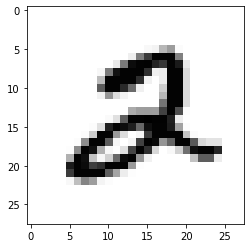

In [46]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5], cmap='Greys')

## Data preparation ##

The Neural Network that we want to build will have an input layer of 784 neurons. See also the architecture picture above. Each of the neurons will represent one pixel in the input image.
There are two issues that we have to address:
The shape: We must convert the 2D shape of 28x28x1 pixels into a 1D array of 784 elements.
The values: Our input neurons expect values between 0.0 and 1.0, however our actual input values are currently 0 to 255. We must scale these values as well.

### Flatten the 28x28 array ###
Flatten the array of each image into a 784 array. Do this for train and test.

In [47]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

Check the results
Let's check that this conversion was successful by checking the new shape of the training set.

In [48]:
x_train.shape

(60000, 784)

Scale the values of the pixels from 0-255 to 0.0-1.0.

In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Check the results
Let's check the result by again displaying our example digit at index 5. You will see that there are no rows anymore in the array (it's 1D now), and that the values are between 0.0 and 1.0.

In [50]:
x_train[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Model build and training ##

Doublecheck the shapes
Let's doublecheck the shapes of the input data before we start the training process.

In [51]:
print('x_train shape:', x_train.shape)
print('x_train shape:', y_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
x_train shape: (60000,)
Number of images in x_train 60000
Number of images in x_test 10000


#### Construct the model ####
Our data is ready to go. Now it's time to build the neural network. Remember, we will build an input layer of 784 neurons, then two hidden layers of 16 neurons each, and finally an output layer of 10 neurons (one for each digit). If this is unclear, please review the architecture at the start of the lab. We are using the Tensorflow and Keras open source libraries for this.

Notice that there is no clear methodology that can tell you from the beggining what the right size and number of hidden layers would be required. To be able to determine this parameters you would need to "debug" the neural network. Change the number of hidden layers or the size of the neurons and monitor if the loss gets lower and the accuracy increases. Later validate this on the test set.
Notice how in the first model.add we have to specify both the input shape (784 neurons) and the first hidden layer (16 neurons).

In [52]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_shape=(784, ), activation=tf.nn.relu))
model.add(Dense(16, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

#### Train the model ####

At this point the initial architecture of our Neural Network is ready. It has random weights to start with. Next, we will train the model to optimize the weights.
Depending on the shape you are running the notebook on, this can take a few minutes.
Notice that the input for the model training is the training images (x_train) and the training labels (y_train). We have chosen 10 epochs. This means the neural network would run through the entire dataset 10 times.

'loss' specifies the loss or also called the objective function. It calculates how far off the neural network's predictions are. The results are used to adjust the weights to minimize the loss.

'optimizer' is a function used to minimize the loss. To do so we need to adjust the waits in the forward and the backpropagation. The optimizer is the function that would be used in that process.

'metrics' is a function that is used to judge the performance of the model. You can specify one or more metrics. It is similar to the loss function but the result is not used when training the model. You could use as metric any of the loss functions available in Keras.


In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4330 - accuracy: 0.8733
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2364 - accuracy: 0.9321
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2009 - accuracy: 0.9415
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1803 - accuracy: 0.9466
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1643 - accuracy: 0.9512
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1546 - accuracy: 0.9541
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1457 - accuracy: 0.9567
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1380 - accuracy: 0.9581
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1318 - accuracy: 0.9607
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.127

## Check model accuracy ##

You should see an accuracy of around 96%. This is the accuracy on the data in the training set. However, as you know by now, it's important to verify the accuracy of the model on unseen data.

#### Visual verification of the model by predicting an example ####
First of all, let's check the performance intuitively through a visualization. Let's take an example image from the test set and check if the model is able to classify it correctly. We'll take a random index of 99.
You will see this is a 9.

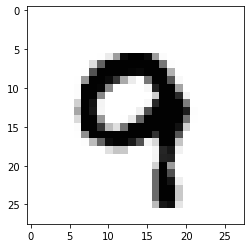

In [56]:
plt.imshow(x_test[99].reshape(28, 28),cmap='Greys')

What is the official label for this digit?
You will see this is labelled as a 9 as well.

In [57]:
y_test[99]

9

Is our model able to correctly classify it as a 9?
The argmax function returns the output neuron that has the highest value. In this case this correctly predicts a 9.

In [58]:
predict = model.predict(x_test[99].reshape(1,784))
print(predict.argmax())

9


#### Numerical verification of the model ####

We can use model.evaluate to calculate the accuracy of prediction on the entire testset. This will run the prediction on the 10000 images in the testset and compare the predicted digits with the actual labels, and calculate an accuracy.

In [59]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9511


[0.16676022112369537, 0.9510999917984009]

You should see an accuracy on unseen data of about 95%. This is the actual accuracy of the model. In other words, the model is able to interpret an image of a digit and correctly classify it in 95% of the cases.